In [1]:
import numpy as np
import os
import pandas as pd
import math

from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource, EventSeeker
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from matplotlib import pyplot as plt
from astropy import units as u

from eventio.simtel.simtelfile import SimTelFile
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [2]:
def read_data(filename):
   
    n_pe = []
    q_res = []
    q_res_err = []

    with open(filename, "r") as file:
        lines = file.readlines()[1:]
        for line in lines:
            words = line.split()
            #print(words[0], ' ; ', words[1], ' ; ', words[2])    
            n_pe.append(float(words[0]))
            q_res.append(float(words[1]))
            q_res_err.append(float(words[2]))
                
    return n_pe, q_res, q_res_err

In [3]:
def read_data(filename):
   
    pixel = []
    n_pe = []
    q_res = []
    q_res_err = []

    with open(filename, "r") as file:
        lines = file.readlines()[1:]
        for line in lines:
            words = line.split()
            #print(words[0], ' ; ', words[1], ' ; ', words[2])    
            pixel.append(float(words[0]))
            n_pe.append(float(words[1]))
            q_res.append(float(words[2]))
            q_res_err.append(float(words[3]))
                
    return pixel, n_pe, q_res, q_res_err

In [4]:
def find_files(path, cut):
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    
    files = []
    for i_file in onlyfiles:
        if i_file[0] != '.':
            if (cut in i_file) or ("4k" in i_file):
                files.append(i_file)
            
    return files

In [5]:
def my_sort(a, b, a_err, b_err):
    
    for i in range (len(a)):
        for j in range (i+1, len(a), 1):
            if(a[i]>a[j]):
                a[i], a[j] = swap_elements(a[i], a[j])
                b[i], b[j] = swap_elements(b[i], b[j])
                a_err[i], a_err[j] = swap_elements(a_err[i], a_err[j])
                b_err[i], b_err[j] = swap_elements(b_err[i], b_err[j])

In [6]:
def swap_elements(a, b):
    tmp = a
    a = b
    b = tmp
    return a, b

In [7]:
find_files("/home/andrii/work/sim_telarray/charge_resolution/pxt_0.25/nsb/PDE_54/", "4k")

['out_file_4k_pxt_0.25_ff-1m_r_3nphot_14000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_4nphot_200000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_4nphot_50000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_1nphot_2000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_2nphot_6000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_5nphot_400000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_1nphot_10000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_2nphot_20000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_3nphot_100000000_dist_500_radius_150_.txt']

In [8]:
n_pixels = 7986

from random import randrange
pixel = randrange(n_pixels)
pixel

2527

In [8]:
path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_0.25/nsb/PDE_54/"
files = find_files(path, "4k")
files

['out_file_4k_pxt_0.25_ff-1m_r_3nphot_14000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_4nphot_200000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_4nphot_50000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_1nphot_2000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_2nphot_6000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_5nphot_400000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_1nphot_10000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_2nphot_20000000_dist_500_radius_150_.txt',
 'out_file_4k_pxt_0.25_ff-1m_r_3nphot_100000000_dist_500_radius_150_.txt']

In [9]:
def read_files_data(path, cut, PDE):
    
    pixel = []
    npe = []
    cr = []
    cr_err = []
    
    n_pe_mean = []
    n_gamma_mean = []
    n_pe_std = []
    
    cr_mean = []
    cr_mean_err = []
    
    files = find_files(path, cut)
    
    for item, i_file in enumerate(files):
        print(item)
        pixel_tmp = []
        n_pe_tmp = []
        cr_tmp = []
        cr_err_tmp = []
    
        pixel_tmp, n_pe_tmp, cr_tmp, cr_err_tmp = read_data(path + i_file)
    
        pixel.append(pixel_tmp)
    
        npe.append(n_pe_tmp)
        cr.append(cr_tmp)
        cr_err.append(cr_err_tmp)
    
        n_pe_mean.append(np.mean(n_pe_tmp))
        n_pe_std.append(np.std(n_pe_tmp))
        n_gamma_mean.append(np.mean(n_pe_tmp)/PDE)
        cr_mean.append(np.mean(cr_tmp))
        cr_mean_err.append(np.mean(cr_err_tmp))
        
    #npe_fl = np.array(npe).flatten('C')
    #ngamma_fl = np.array(npe).flatten('C')/PDE
    #q_fl = np.array(cr).flatten('C')
    #q_err_fl = np.array(cr_err).flatten('C')

    my_sort(n_gamma_mean, cr_mean, cr_mean_err, n_pe_std)
    
    return n_gamma_mean, n_pe_std, cr_mean, cr_mean_err, npe, cr, cr_err

In [10]:
n_gamma_mean, n_pe_std, cr_mean, cr_mean_err, npe, cr, cr_err = read_files_data("/home/andrii/work/sim_telarray/charge_resolution/pxt_0.25/nsb/PDE_54/", "4k", 0.5468)

npe_fl = np.array(npe).flatten('C')
ngamma_fl = np.array(npe).flatten('C')/0.5468
q_fl = np.array(cr).flatten('C')
q_err_fl = np.array(cr_err).flatten('C')

0
1
2
3
4
5
6
7
8


In [21]:
len(n_gamma_mean)

9

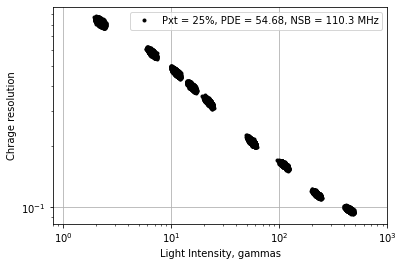

In [11]:
plt.plot(ngamma_fl, q_fl, '.', color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
#plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r', label='Poisson limit, gammas')
plt.xlim([0.8, 1000])
#plt.savefig('charge_resolution_all_nsb.png', dpi=1800)
plt.show()

In [12]:
n_gamma_mean

[2.22781683503799,
 6.682843549993319,
 11.13777071812654,
 15.593125153355915,
 22.278455599346742,
 55.694492898069825,
 111.40286098597127,
 222.73500995445323,
 445.6145555405552]

In [10]:
pixel = []
npe_25 = []
q_25 = []
q_25_err = []

n_pe_mean_25 = []
n_gamma_mean_25 = []
n_pe_std_25 = []
q_mean_25 = []
q_mean_25_err = []

PDE = 0.5468

path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_0.25/nsb/PDE_54/"
files = find_files(path, "4k")

for item, i_file in enumerate(files):
    print(item)
    pixel_tmp = []
    n_pe_tmp = []
    q_tmp = []
    q_err_tmp = []
    
    pixel_tmp, n_pe_tmp, q_tmp, q_err_tmp = read_data(path + i_file)
    
    pixel.append(pixel_tmp)
    
    npe_25.append(n_pe_tmp)
    q_25.append(q_tmp)
    q_25_err.append(q_err_tmp)
    
    n_pe_mean_25.append(np.mean(n_pe_tmp))
    n_pe_std_25.append(np.std(n_pe_tmp))
    n_gamma_mean_25.append(np.mean(n_pe_tmp)/PDE)
    q_mean_25.append(np.mean(q_tmp))
    q_mean_25_err.append(np.mean(q_err_tmp))
    
npe_25_fl = np.array(npe_25).flatten('C')
ngamma_25_fl = np.array(npe_25).flatten('C')/PDE
q_25_fl = np.array(q_25).flatten('C')
q_25_err_fl = np.array(q_25_err).flatten('C')

my_sort(n_gamma_mean_25, q_mean_25, q_mean_25_err, n_pe_std_25)

0
1
2
3
4
5
6
7
8


In [8]:
pixel_fbk = []
npe_25_fbk = []
q_25_fbk = []
q_25_fbk_err = []

n_pe_mean_25_fbk = []
n_gamma_mean_25_fbk = []
n_pe_std_25_fbk = []
q_mean_25_fbk = []
q_mean_25_fbk_err = []

PDE = 0.5468

path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_0.25/NUV-HD/nsb/Cherenkov/PDE_52/"
files = find_files(path, "4k")

for item, i_file in enumerate(files):
    print(item)
    pixel_tmp = []
    n_pe_tmp = []
    q_tmp = []
    q_err_tmp = []
    
    pixel_tmp, n_pe_tmp, q_tmp, q_err_tmp = read_data(path + i_file)
    
    pixel_fbk.append(pixel_tmp)
    
    npe_25_fbk.append(n_pe_tmp)
    q_25_fbk.append(q_tmp)
    q_25_fbk_err.append(q_err_tmp)
    
    n_pe_mean_25_fbk.append(np.mean(n_pe_tmp))
    n_pe_std_25_fbk.append(np.std(n_pe_tmp))
    n_gamma_mean_25_fbk.append(np.mean(n_pe_tmp)/PDE)
    q_mean_25_fbk.append(np.mean(q_tmp))
    q_mean_25_fbk_err.append(np.mean(q_err_tmp))
    
npe_25_fbk_fl = np.array(npe_25_fbk).flatten('C')
ngamma_25_fbk_fl = np.array(npe_25_fbk).flatten('C')/PDE
q_25_fbk_fl = np.array(q_25_fbk).flatten('C')
q_25_fbk_err_fl = np.array(q_25_fbk_err).flatten('C')

my_sort(n_pe_mean_25_fbk, q_mean_25_fbk, q_mean_25_fbk_err, n_pe_std_25_fbk)

0
1
2
3
4
5
6


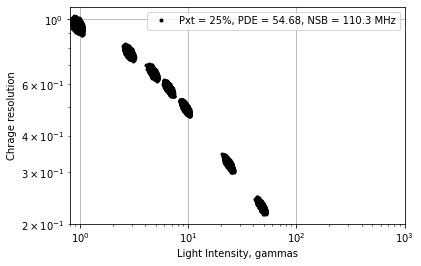

In [10]:
plt.plot(ngamma_25_fbk_fl, q_25_fbk_fl, '.', color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
#plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r', label='Poisson limit, gammas')
plt.xlim([0.8, 1000])
plt.savefig('charge_resolution_all_nsb.png', dpi=1800)
plt.show()

In [11]:
pixel_15 = []
n_pe_15 = []
q_15 = []
q_15_err = []

n_pe_mean_15 = []
n_gamma_mean_15 = []
n_pe_std_15 = []
q_mean_15 = []
q_mean_15_err = []

PDE = 0.5341
path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_0.15/nsb/PDE_53/"
files = find_files(path, "4k")

for item, i_file in enumerate(files):
    pixel_tmp = []
    n_pe_tmp = []
    q_tmp = []
    q_err_tmp = []
    
    pixel_tmp, n_pe_tmp, q_tmp, q_err_tmp = read_data(path + i_file)
    
    pixel_15.append(pixel_tmp)
    n_pe_15.append(n_pe_tmp)
    q_15.append(q_tmp)
    q_15_err.append(q_err_tmp)
    
    n_pe_mean_15.append(np.mean(n_pe_tmp))
    n_pe_std_15.append(np.std(n_pe_tmp))
    n_gamma_mean_15.append(np.mean(n_pe_tmp)/PDE)
    q_mean_15.append(np.mean(q_tmp))
    q_mean_15_err.append(np.mean(q_err_tmp))
    
npe_15_fl = np.array(n_pe_15).flatten('C')
ngamma_15_fl = np.array(n_pe_15).flatten('C')/PDE
q_15_fl = np.array(q_15).flatten('C')
q_15_err_fl = np.array(q_15_err).flatten('C')

my_sort(n_gamma_mean_15, q_mean_15, q_mean_15_err, n_pe_std_15)

In [12]:
my_sort(n_gamma_mean_15, q_mean_15, q_mean_15_err, n_pe_std_15)

In [13]:
pixel_8 = []
npe_8 = []
q_8 = []
q_8_err = []

n_pe_mean_8 = []
n_gamma_mean_8 = []
n_pe_std_8 = []
q_mean_8 = []
q_mean_8_err = []

PDE = 0.4715
path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_0.08/nsb/PDE_47/"
files = find_files(path, "4k")

for item, i_file in enumerate(files):
    pixel_tmp = []
    n_pe_tmp = []
    q_tmp = []
    q_err_tmp = []
    
    pixel_tmp, n_pe_tmp, q_tmp, q_err_tmp = read_data(path + i_file)
    
    pixel_8.append(pixel_tmp)
    npe_8.append(n_pe_tmp)
    q_8.append(q_tmp)
    q_8_err.append(q_err_tmp)
    
    n_pe_mean_8.append(np.mean(n_pe_tmp))
    n_pe_std_8.append(np.std(n_pe_tmp))
    n_gamma_mean_8.append(np.mean(n_pe_tmp)/PDE)
    q_mean_8.append(np.mean(q_tmp))
    q_mean_8_err.append(np.mean(q_err_tmp))
    
npe_8_fl = np.array(npe_8).flatten('C')
ngamma_8_fl = np.array(npe_8).flatten('C')/PDE
q_8_fl = np.array(q_8).flatten('C')
q_8_err_fl = np.array(q_8_err).flatten('C')

my_sort(n_gamma_mean_8, q_mean_8, q_mean_8_err, n_pe_std_8)

In [14]:
pixel_5 = []
n_pe_5 = []
q_5 = []
q_5_err = []

n_pe_mean_5 = []
n_gamma_mean_5 = []
n_pe_std_5 = []
q_mean_5 = []
q_mean_5_err = []

PDE = 0.372

path = "/home/andrii/work/sim_telarray/charge_resolution/pxt_0.05/nsb/PDE_38/"
files = find_files(path, "4k")

for item, i_file in enumerate(files):
    pixel_tmp = []
    n_pe_tmp = []
    q_tmp = []
    q_err_tmp = []
    
    pixel_tmp, n_pe_tmp, q_tmp, q_err_tmp = read_data(path + i_file)
    
    pixel_5.append(pixel_tmp)
    n_pe_5.append(n_pe_tmp)
    q_5.append(q_tmp)
    q_5_err.append(q_err_tmp)
    
    n_pe_mean_5.append(np.mean(n_pe_tmp))
    n_pe_std_5.append(np.std(n_pe_tmp))
    n_gamma_mean_5.append(np.mean(n_pe_tmp)/PDE)
    q_mean_5.append(np.mean(q_tmp))
    q_mean_5_err.append(np.mean(q_err_tmp))
    
    
npe_5_fl = np.array(n_pe_5).flatten('C')
ngamma_5_fl = np.array(n_pe_5).flatten('C')/PDE
q_5_fl = np.array(q_5).flatten('C')
q_5_err_fl = np.array(q_5_err).flatten('C')

my_sort(n_gamma_mean_5, q_mean_5, q_mean_5_err, n_pe_std_5)

In [15]:
n_intervals = len(ngamma)/(n_pixels+1)
n_intervals

NameError: name 'ngamma' is not defined

In [16]:
charge_resolution_poisson_gammas = []
gammas_poisson = np.arange(1, 700, 1)

for i in range(len(gammas_poisson)):
    charge_resolution_poisson_gammas.append(1./math.sqrt(gammas_poisson[i]))

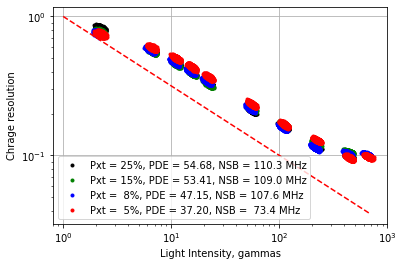

In [17]:
plt.plot(ngamma_25_fl, q_25_fl, '.', color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')
plt.plot(ngamma_15_fl, q_15_fl, '.', color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.plot(ngamma_8_fl,  q_8_fl,  '.', color = 'blue',  label='Pxt =  8%, PDE = 47.15, NSB = 107.6 MHz')
plt.plot(ngamma_5_fl,  q_5_fl,  '.', color = 'red',   label='Pxt =  5%, PDE = 37.20, NSB =  73.4 MHz')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r', label='Poisson limit, gammas')
plt.xlim([0.8, 1000])
plt.savefig('charge_resolution_all_nsb.png', dpi=1800)
plt.show()

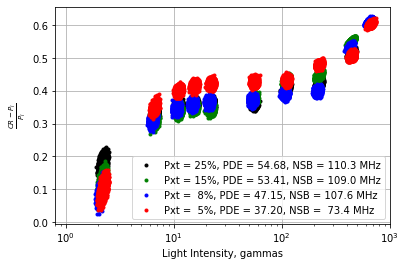

In [19]:
plt.plot(ngamma_25_fl, (np.array(q_25_fl) -  1./np.sqrt((ngamma_25_fl)) )/np.array(q_25_fl), '.', color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')
plt.plot(ngamma_15_fl, (np.array(q_15_fl) -  1./np.sqrt((ngamma_15_fl)) )/np.array(q_15_fl), '.', color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.plot(ngamma_8_fl,  (np.array(q_8_fl) -  1./np.sqrt((ngamma_8_fl)) )/np.array(q_8_fl),  '.', color = 'blue',  label='Pxt =  8%, PDE = 47.15, NSB = 107.6 MHz')
plt.plot(ngamma_5_fl,  (np.array(q_5_fl) -  1./np.sqrt((ngamma_5_fl)) )/np.array(q_5_fl),  '.', color = 'red',   label='Pxt =  5%, PDE = 37.20, NSB =  73.4 MHz')
plt.xscale('log')
#plt.yscale('log')
plt.grid(True)
plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel(r'$\frac{CR - P_{l}}{P_{l}}$')
#plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r', label='Poisson limit, gammas')
plt.xlim([0.8, 1000])
plt.savefig('charge_resolution_all_nsb_difference_all.png', dpi=1800)
plt.show()

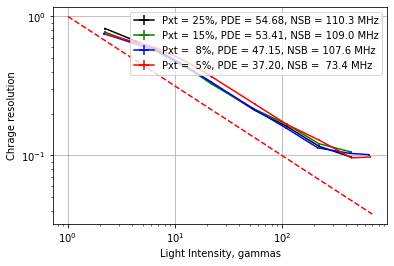

In [196]:
plt.errorbar(n_gamma_mean_25, q_mean_25, yerr = q_mean_25_err, xerr = n_pe_std_25, color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')
plt.errorbar(n_gamma_mean_15, q_mean_15, yerr = q_mean_15_err, xerr = n_pe_std_15, color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.errorbar(n_gamma_mean_8, q_mean_8, yerr = q_mean_8_err, xerr = n_pe_std_8, color = 'blue',  label='Pxt =  8%, PDE = 47.15, NSB = 107.6 MHz')
plt.errorbar(n_gamma_mean_5, q_mean_5, yerr = q_mean_5_err, xerr = n_pe_std_5, color = 'red',   label='Pxt =  5%, PDE = 37.20, NSB =  73.4 MHz')

plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r')
plt.savefig('charge_resolution_all_nsb.png', dpi=1800)
plt.show()

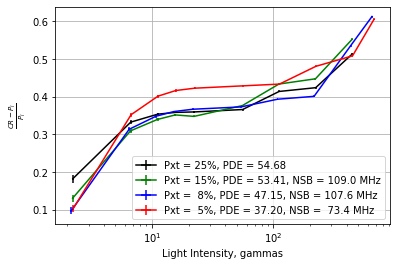

In [201]:
plt.errorbar(n_gamma_mean_25, (np.array(q_mean_25) -  1./np.sqrt((n_gamma_mean_25)) )/np.array(q_mean_25), yerr = q_mean_25_err, xerr = n_pe_std_25, color = 'black', label='Pxt = 25%, PDE = 54.68')
plt.errorbar(n_gamma_mean_15, (np.array(q_mean_15) -  1./np.sqrt((n_gamma_mean_15)) )/np.array(q_mean_15), yerr = q_mean_15_err, xerr = n_pe_std_15, color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
plt.errorbar(n_gamma_mean_8, (np.array(q_mean_8) -  1./np.sqrt((n_gamma_mean_8)) )/np.array(q_mean_8), yerr = q_mean_8_err, xerr = n_pe_std_8, color = 'blue',  label='Pxt =  8%, PDE = 47.15, NSB = 107.6 MHz')
plt.errorbar(n_gamma_mean_5, (np.array(q_mean_5) -  1./np.sqrt((n_gamma_mean_5)) )/np.array(q_mean_5), yerr = q_mean_5_err, xerr = n_pe_std_5, color = 'red',   label='Pxt =  5%, PDE = 37.20, NSB =  73.4 MHz')

plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title('')
plt.xlabel('Light Intensity, gammas')
plt.ylabel(r'$\frac{CR - P_{l}}{P_{l}}$')
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

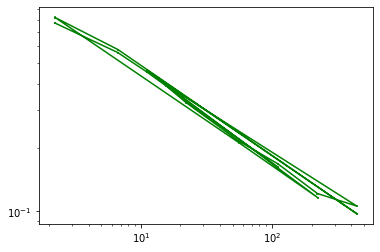

In [187]:
plt.errorbar(n_gamma_mean_15, q_mean_15, yerr = q_mean_15_err, xerr = n_pe_std_15, color = 'green', label='Pxt = 8%, PDE = 47.15, NSB = 107.6 MHz')
#plt.hist2d(ngamma_5_fl,  q_5_fl, (500, 500))
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

/home/andrii/anaconda3/envs/cta/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/andrii/anaconda3/envs/cta/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)
No handles with labels found to put in legend.


(0.03, 1.2)

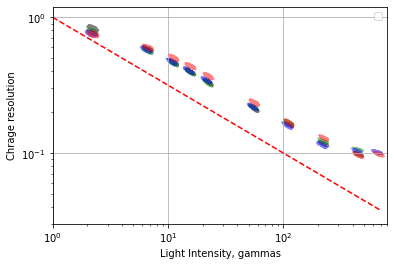

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_scatter_density  # noqa

from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

#norm = ImageNormalize(vmin=0., vmax=1000, stretch=LogStretch())
norm = ImageNormalize(vmin=0., vmax=5)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

#ax.scatter_density(ngamma_25_fl, q_25_fl, norm=norm, alpha=0.9, cmap='Greys')
#ax.scatter_density(ngamma_15_fl, q_15_fl, norm=norm, alpha=0.9, cmap='Greens')
#ax.scatter_density(ngamma_8_fl, q_8_fl,norm=norm,  alpha=0.9, cmap='Blues', label='Pxt = 8%, PDE = 47.15, NSB = 107.6 MHz')
#ax.scatter_density(ngamma_5_fl, q_5_fl, norm=norm, alpha=0.9, cmap='Reds')

ax.scatter_density(ngamma_25_fl, q_25_fl, norm=norm, alpha=0.5,  color='black')
ax.scatter_density(ngamma_15_fl, q_15_fl, norm=norm, alpha=0.5, color='green')
ax.scatter_density(ngamma_8_fl, q_8_fl,norm=norm,  alpha=0.5, color='blue', label='Pxt = 8%, PDE = 47.15, NSB = 107.6 MHz')
ax.scatter_density(ngamma_5_fl, q_5_fl, norm=norm, alpha=0.5, color='red')
ax.legend()
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
#plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')

plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r', label='Poisson limit, gammas')
ax.set_xlim(1, 800)
ax.set_ylim(0.03, 1.2)

#fig.colorbar(density, label='Number of points per pixel')

/home/andrii/anaconda3/envs/cta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andrii/anaconda3/envs/cta/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


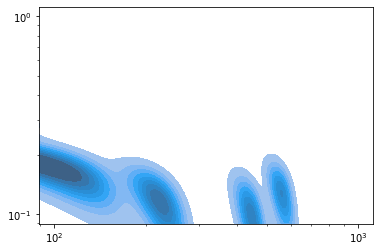

In [99]:
sns.kdeplot(ngamma_25_fl, q_25_fl, shade=True, shade_lowest=False)
plt.xscale('log')
plt.yscale('log')

In [439]:
n_pixels = 7986

from random import randrange
pixel = randrange(n_pixels)
pixel

3352

In [440]:
n_points = int(len(ngamma_25)/(n_pixels+1))

print('n points : ', n_points)

gamma_25_pixel = np.zeros(n_points)
gamma_25_pixel_err = np.zeros(n_points)
q_25_pixel = np.zeros(n_points)
q_25_err_pixel = np.zeros(n_points)

step = int(len(ngamma_25)/n_points)
print('step : ', step)

for i in range(n_points):
    #print(gamma_25_pixel)
    gamma_25_pixel[i] = ngamma_25[int(pixel + i*step)]
    gamma_25_pixel_err[i] = math.sqrt(gamma_25_pixel[i])
    q_25_pixel[i] = q_25[int(pixel + i*step)]
    q_25_err_pixel[i] = q_25_err[int(pixel + i*step)]
    
print("gamma  : ", gamma_25_pixel)
print("CR     : ", q_25_pixel)
print("CR err : ", q_25_err_pixel)

n points :  8
step :  7987
gamma  :  [ 15.0164594  211.50832114  53.34537308   2.10908925   6.35790051
  10.7649049   21.84070958 106.13066935]
CR     :  [0.40243788 0.12026624 0.21401316 0.82420453 0.5973559  0.46868008
 0.33123681 0.16682369]
CR err :  [0.00256075 0.0002287  0.00072419 0.01074088 0.00564204 0.00347315
 0.00173479 0.00044003]


In [41]:
def my_sort(a, b, a_err, b_err):
    
    for i in range (len(a)):
        for j in range (i+1, len(a), 1):
            if(a[i]>a[j]):
                a[i], a[j] = swap_elements(a[i], a[j])
                b[i], b[j] = swap_elements(b[i], b[j])
                a_err[i], a_err[j] = swap_elements(a_err[i], a_err[j])
                b_err[i], b_err[j] = swap_elements(b_err[i], b_err[j])
                
def swap_elements(a, b):
    tmp = a
    a = b
    b = tmp
    return a, b

In [42]:
def swap_elements(a, b):
    tmp = a
    a = b
    b = tmp
    return a, b

In [441]:
my_sort(gamma_25_pixel, q_25_pixel, gamma_25_pixel_err, q_25_err_pixel)

In [55]:
plt.errorbar(gamma_25_pixel, q_25_pixel, yerr = q_25_err_pixel,  xerr = gamma_25_pixel_err, color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')
#plt.errorbar(gammas_mean_nsb_pde[1][1:], charge_resolution_nsb_pde[1][1:], yerr = charge_resolution_std_nsb_pde[1][1:], xerr = gammas_mean_nsb_pde_std[1][1:], color = 'blue', label='Pxt = 8%, PDE = 47.15, NSB = 107.6 MHz')
#plt.errorbar(gammas_mean_nsb_pde[2][1:], charge_resolution_nsb_pde[2][1:], yerr = charge_resolution_std_nsb_pde[2][1:], xerr = gammas_mean_nsb_pde_std[2][1:], color = 'green', label='Pxt = 15%, PDE = 53.41, NSB = 109.0 MHz')
#plt.errorbar(gammas_mean_nsb_pde[3][1:], charge_resolution_nsb_pde[3][1:], yerr = charge_resolution_std_nsb_pde[3][1:], xerr = gammas_mean_nsb_pde_std[3][1:], color = 'black', label='Pxt = 25%, PDE = 54.68, NSB = 110.3 MHz')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Charge Resolution')
plt.grid(True)
plt.plot(gammas_poisson, charge_resolution_poisson_gammas, "--r", label='Poisson limit, gammas')
plt.legend()
plt.ylim(0.04, 1)
plt.xlim(0.8, 1000)
#plt.savefig('Charge_resolution_1k_events_gammas.png', dpi=1800)
plt.show()

NameError: name 'gamma_25_pixel' is not defined

In [31]:
d_25 = {'n p.e.': npe_25_fl, 'n gammas': ngamma_25_fl, 'charge resolution': q_25_fl, 'charge resolution err': q_25_err_fl, 'p_xt': np.ones(len(ngamma_25_fl))*0.25, 'pde': np.ones(len(ngamma_25_fl))*0.5468 }
d_15 = {'n p.e.': npe_15_fl, 'n gammas': ngamma_15_fl, 'charge resolution': q_15_fl, 'charge resolution err': q_15_err_fl, 'p_xt': np.ones(len(ngamma_15_fl))*0.15, 'pde': np.ones(len(ngamma_15_fl))*0.5341 }
d_8  = {'n p.e.': npe_8_fl,  'n gammas': ngamma_8_fl,  'charge resolution': q_8_fl,  'charge resolution err': q_8_err_fl,  'p_xt': np.ones(len(ngamma_8_fl))*0.08, 'pde': np.ones(len(ngamma_8_fl))*0.4715 }
d_5  = {'n p.e.': npe_5_fl,  'n gammas': ngamma_5_fl,  'charge resolution': q_5_fl,  'charge resolution err': q_5_err_fl,  'p_xt': np.ones(len(ngamma_5_fl))*0.05,  'pde': np.ones(len(ngamma_5_fl))*0.372 }
df_25 = pd.DataFrame(data=d_25)
df_15 = pd.DataFrame(data=d_15)
df_8 = pd.DataFrame(data=d_8)
df_5 = pd.DataFrame(data=d_5)

df_row_reindex = pd.concat([df_25, df_15, df_8, df_5], ignore_index=True)



In [50]:
df_row_reindex

n p.e.    n gammas  charge resolution  charge resolution err  p_xt  \
0         8.80050   16.094550           0.389959               0.002404  0.25   
1         8.79200   16.079005           0.386131               0.002357  0.25   
2         9.04225   16.536668           0.382489               0.002313  0.25   
3         8.95675   16.380304           0.389636               0.002400  0.25   
4         8.43725   15.430230           0.399524               0.002524  0.25   
...           ...         ...                ...                    ...   ...   
311488  155.51425  418.049059           0.098451               0.000153  0.05   
311489  159.34450  428.345430           0.098001               0.000152  0.05   
311490  153.74425  413.290995           0.098660               0.000154  0.05   
311491  163.74225  440.167339           0.097012               0.000149  0.05   
311492  159.48425  428.721102           0.098206               0.000152  0.05   

           pde  
0       0.5468  
1       0.5468  
2       0.5468  
3       0.5468  
4       0.5468  
...        ...  
311488  0.3720  
311489  0.3720  
311490  0.3720  
311491  0.3720  
311492  0.3720  

[311493 rows x 6 columns]

Text(12.280763888888885, 0.5, 'Chrage resolution')

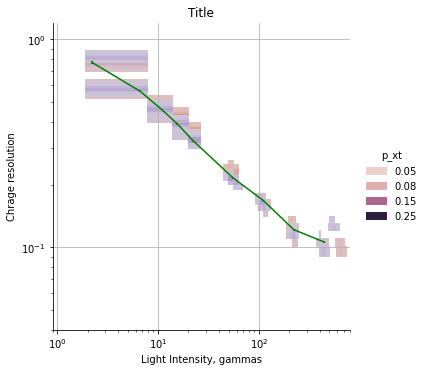

In [54]:
sns.displot(df_row_reindex, x="n gammas", y="charge resolution", hue="p_xt")
plt.errorbar(n_gamma_mean_15, q_mean_15, yerr = q_mean_15_err, xerr = n_pe_std_15, color = 'green', label='Pxt = 8%, PDE = 47.15, NSB = 107.6 MHz')
plt.title('Title')
plt.ylim(0.04, 1.2)
plt.xlim(0.9, 800)
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
#plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
#plt.plot(pe_poisson, charge_resolution_poisson_gammas, '--r')
#plt.savefig('charge_resolution_all_nsb.png', dpi=1800)
#plt.show()

In [282]:
len(ngamma)/7987

7.0

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
sns.set_style("white")

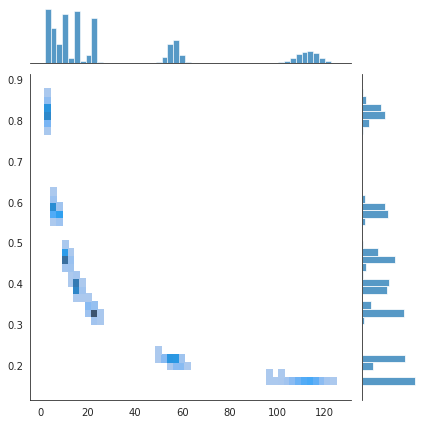

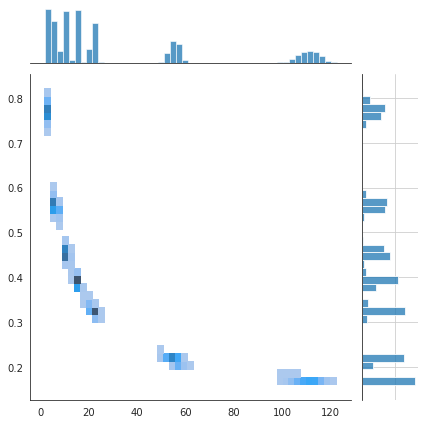

In [174]:
sns.jointplot(x=ngamma, y=q, kind="hist")
sns.jointplot(x=ngamma_15, y=q_15, kind="hist")
plt.grid(True)
plt.show()